In [2]:
import os
import json
from tqdm.notebook import tqdm
from PIL import Image
from PIL import ImageDraw
from PIL import ImageFont

In [5]:
with open("C:\\Users\\Yulia\\Desktop\\carbs-count\\experiment_1\\prediction_results\\prediction_dict_prediction_exp_depth_resnet152_dish.json") as json_file:
    json_depth_test = json.load(json_file)

In [7]:
list_dish = []
for dish in tqdm(json_depth_test.keys()):
    diff = float(list(json_depth_test[dish].keys())[0]) - float(list(json_depth_test[dish].values())[0])
    if  abs(diff) <= 5:
        list_dish.append(dish)


  0%|          | 0/507 [00:00<?, ?it/s]

In [9]:
len(list_dish)

111

In [56]:
path = "C:\\Users\\Yulia\\Desktop\\carbs-count\\images\\test_RGB\\"
path_to = "C:\\Users\\Yulia\\Desktop\\carbs-count\\images\\img_with_results\\good\\"
for good_pred in tqdm(list_dish):
    img = Image.open(path + good_pred + '.png')
    I1 = ImageDraw.Draw(img)
    myFont = ImageFont.truetype('arial/arial.ttf', 20)
    prediction = round(json_depth_test[good_pred][list(json_depth_test[good_pred].keys())[0]], 2)
    true_value = round(float(list(json_depth_test[good_pred].keys())[0]), 3)
    diff = prediction - true_value
    consequences = round(-1 * (diff * 2.77 ) / 10, 3)
    I1.text((10, 10), f'Prediction: {prediction}g, {round(prediction / 10, 3)} BU', font=myFont, fill =(255, 255, 255), stroke_width=2, stroke_fill=(100, 100, 100))
    I1.text((10, 40), f'True: {true_value}g, {round(true_value / 10, 3)} BU', font=myFont, fill =(255, 255, 255), stroke_width=2, stroke_fill=(100, 100, 100))
    I1.text((10, 70), f'consequences: {consequences} mmol/l', font=myFont, fill =(255, 255, 255), stroke_width=2, stroke_fill=(100, 100, 100))
    img.save(path_to + f'{good_pred}.png')


  0%|          | 0/111 [00:00<?, ?it/s]

In [57]:
list_dish_bad = []
for dish in json_depth_test.keys():
    diff = float(list(json_depth_test[dish].keys())[0]) - float(list(json_depth_test[dish].values())[0])
    if  abs(diff) > 10:
        list_dish_bad.append(dish)

In [60]:
path = "C:\\Users\\Yulia\\Desktop\\carbs-count\\images\\test_RGB\\"
path_to = "C:\\Users\\Yulia\\Desktop\\carbs-count\\images\\img_with_results\\bad\\"
for bad_pred in tqdm(list_dish_bad):
    img = Image.open(path + bad_pred + '.png')
    I1 = ImageDraw.Draw(img)
    myFont = ImageFont.truetype('arial/arial.ttf', 20)
    prediction = round(json_depth_test[bad_pred][list(json_depth_test[bad_pred].keys())[0]], 2)
    true_value = round(float(list(json_depth_test[bad_pred].keys())[0]), 3)
    diff = prediction - true_value
    consequences = round(-1 * (diff * 2.77 ) / 10, 3)
    I1.text((10, 10), f'Prediction: {prediction}g, {round(prediction / 10, 3)} BU', font=myFont, fill =(255, 255, 255), stroke_width=2, stroke_fill=(100, 100, 100))
    I1.text((10, 40), f'True: {true_value}g, {round(true_value / 10, 3)} BU', font=myFont, fill =(255, 255, 255), stroke_width=2, stroke_fill=(100, 100, 100))
    I1.text((10, 70), f'consequences: {consequences} mmol/l', font=myFont, fill =(255, 255, 255), stroke_width=2, stroke_fill=(100, 100, 100))
    img.save(path_to + f'{bad_pred}.png')

  0%|          | 0/290 [00:00<?, ?it/s]

Посмотрим внимательнее на предсказания

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
os.chdir('C:\\Users\\Yulia\\Desktop\\carbs-count')

In [7]:
with open('fr/prediction_depth_resnet152.json') as json_file:
    json_depth_resnet152 = json.load(json_file)
with open('fr/prediction_rgb_resnet152.json') as json_file:
    json_rgb_resnet152 = json.load(json_file)

In [25]:
true_depth = np.array(list(json_depth_resnet152.keys())).astype(float)
pred_depth = np.array(list(json_depth_resnet152.values())).astype(float)
residuals_depth = list(np.array(true_depth) - np.array(pred_depth))

In [64]:
true_rgb = np.array(list(json_rgb_resnet152.keys())).astype(float)
pred_rgb = np.array(list(json_rgb_resnet152.values())).astype(float)
residuals_rgb = list(np.array(true_rgb) - np.array(pred_rgb))

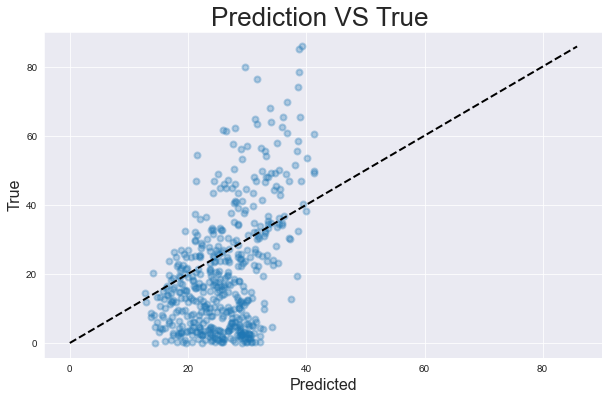

In [23]:
fig = plt.figure(figsize=(10, 6))
plt.scatter(pred_depth, true_depth, lw=2, alpha=0.3)
plt.plot([min(true_depth),max(true_depth)], [min(true_depth),max(true_depth)],
         linestyle='--', lw=2, color='black')
plt.xlabel('Predicted', fontsize=16)
plt.ylabel('True', fontsize=16)
plt.title('Prediction VS True ', fontsize=26)
plt.savefig('prediction_vs_true.png')
plt.show()

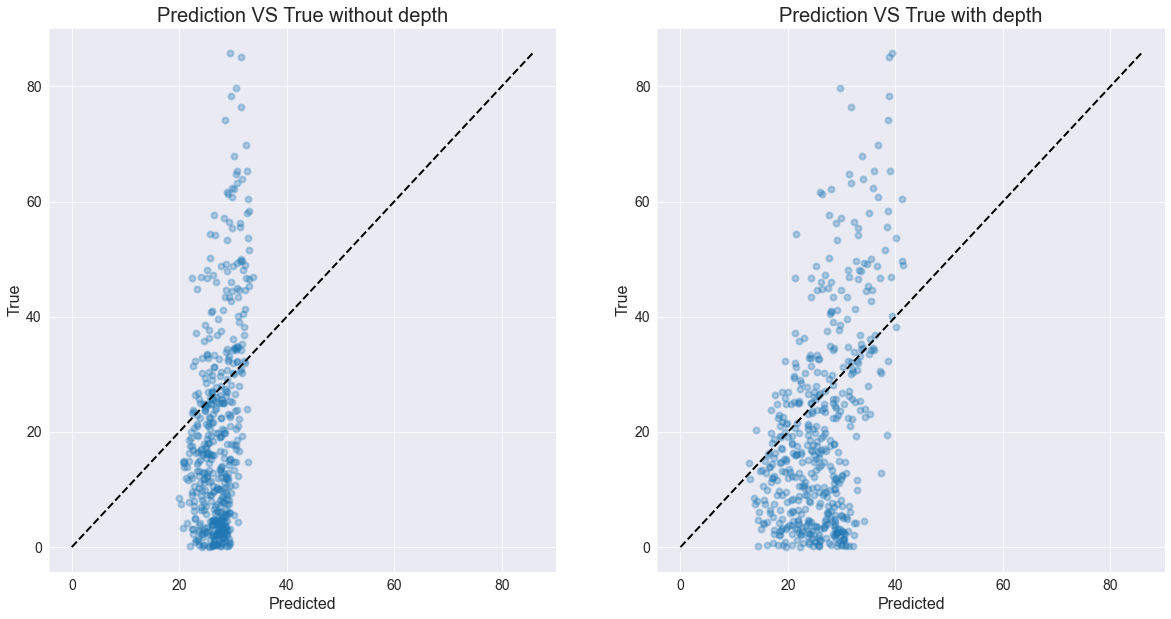

In [39]:
font_props_labels = {'size': 14}
fig, ax = plt.subplots(nrows=1, ncols=2,  sharex=False, sharey=False, figsize=(20, 10))
ax[1].scatter(pred_depth, true_depth, lw=2, alpha=0.3)
ax[1].plot([min(true_depth),max(true_depth)], [min(true_depth),max(true_depth)],
         linestyle='--', lw=2, color='black')
ax[0].scatter(pred_rgb, true_rgb, lw=2, alpha=0.3)
ax[0].plot([min(true_rgb),max(true_rgb)], [min(true_rgb),max(true_rgb)],
         linestyle='--', lw=2, color='black')
ax[1].set_title(f'Prediction VS True with depth',fontsize=20)
ax[1].set_xlabel('Predicted', fontsize=16)
ax[1].set_ylabel('True', fontsize=16)
ax[0].set_title(f'Prediction VS True without depth', fontsize=20)
ax[0].set_xlabel('Predicted', fontsize=16)
ax[0].set_ylabel('True', fontsize=16)
for a in ax:
        for label in (a.get_xticklabels() + a.get_yticklabels()):
            label.set_font(font_props_labels)
plt.savefig('work_with_results/prediction_vs_true.png')


C:\Users\Yulia\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Yulia\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


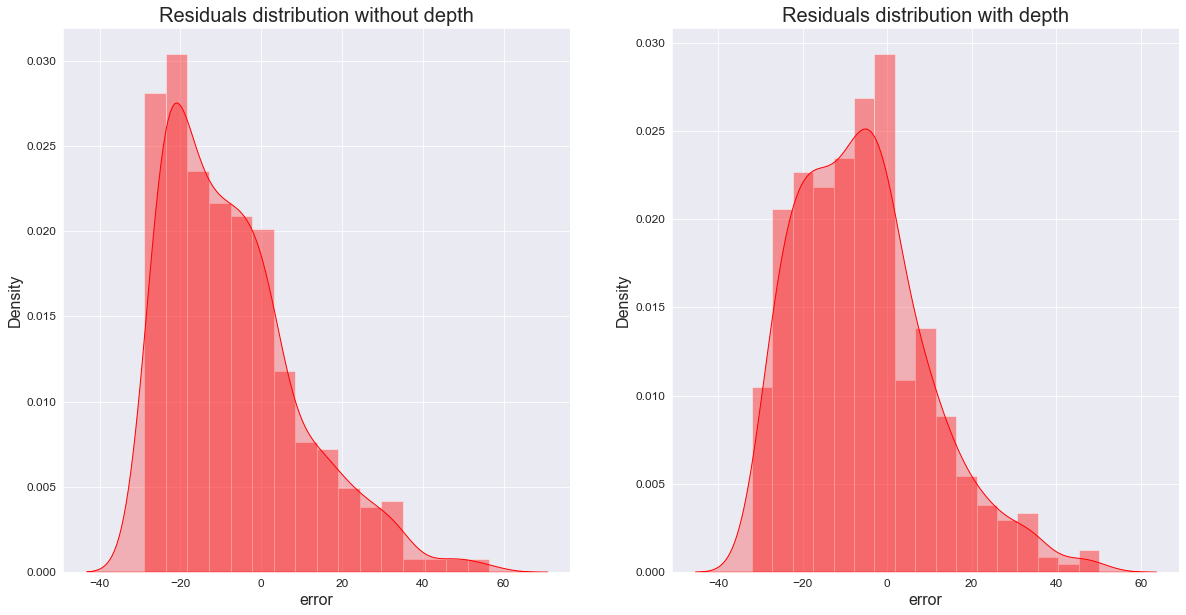

In [67]:
fig, ax = plt.subplots(nrows=1, ncols=2,  sharex=False, sharey=False, figsize=(20, 10))
font_props_labels = {'size': 12}
# fig.suptitle("Residuals distribution", fontsize=20)
sns.distplot(residuals_depth, color="red", hist=True, kde=True, kde_kws={"shade":True}, ax=ax[1])
sns.distplot(residuals_rgb, color="red", hist=True, kde=True, kde_kws={"shade":True}, ax=ax[0])
ax[1].grid(True)
ax[0].grid(True)
# ax.set( title="Residuals distribution")
ax[1].set_xlabel('error',fontsize=16)
ax[0].set_xlabel('error',fontsize=16)
ax[1].set_ylabel('Density',fontsize=16)
ax[0].set_ylabel('Density',fontsize=16)
for a in ax:
    for label in (a.get_xticklabels() + a.get_yticklabels()):
        label.set_font(font_props_labels)
ax[1].set_title(f'Residuals distribution with depth',fontsize=20)
ax[0].set_title(f'Residuals distribution without depth',fontsize=20)
plt.savefig('work_with_results/res_distr.png')
plt.show()

In [69]:
from sklearn import metrics

In [79]:
from scipy import stats
print(stats.ttest_ind(pred_depth, pred_rgb))
print(stats.ttest_ind(pred_depth, pred_rgb, equal_var=False))

Ttest_indResult(statistic=-3.839081984434783, pvalue=0.00013138312173581118)
Ttest_indResult(statistic=-3.839081984434784, pvalue=0.00013469044468766923)


In [80]:
from scipy.stats import mannwhitneyu
mannwhitneyu(pred_depth, pred_rgb)

MannwhitneyuResult(statistic=104497.0, pvalue=0.00013996459599186596)